In [2]:
from cupy.array_api import uint8
!pip install numpy matplotlib 

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/05/db/5d9c91b2e1e2e72be1369278f696356d44975befcae830daf2e667dcb54f/numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/8d/9d/d06860390f9d154fa884f1740a5456378fb153ff57443c91a4a32bab7092/matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/99/e6/d11966962b1aa515f5586d3907ad019f4b812c04e4546cc19ebf62b5178e/contourpy-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached contourpy-1.3.0-cp310-cp310-manylinux_

In [9]:
!pip install cupy-cuda12x

  Obtaining dependency information for cupy-cuda12x from https://files.pythonhosted.org/packages/7a/a9/1e19ecf008011df2935d038f26f721f22f2804c00077fc024f088e0996e6/cupy_cuda12x-13.3.0-cp310-cp310-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fastrlock>=0.5 from https://files.pythonhosted.org/packages/bc/5d/d1f89b59f5b4b4710fd126e0df31ca4c58f46fc0a831058fc49010972d3d/fastrlock-0.8.2-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 2.0 MB/s eta 0:00:0000:0100:020m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cupy as cp
from IPython.core.pylabtools import figsize

In [22]:
# Load data and setup parameters
data = cp.load('CWLITEXMEGA_TINYAES128C_fixedkey.npz', allow_pickle=True)
t = data['t']  # Traces
p = data['p']  # Plaintexts
k = data['k']  # Known Key
(trace_num, trace_len) = t.shape
print(f'{trace_num} traces, each with {trace_len} points.')


AES_Sbox = cp.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ], dtype=cp.uint8)
# The Hamming weight list of each byte value
hw_list = np.array([
            0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5,
            1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6,
            1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6,
            2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7,
            1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6,
            2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7,
            2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7,
            3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7, 4, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 7, 6, 7, 7, 8
            ], dtype=cp.uint8)

30000 traces, each with 5000 points.


True Key : [ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[0][0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1][0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2][0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3][0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[4][161 218 174 184 212   9 228 182  29  28 220 223 121 210  60 109]
[5][ 64 130 125  23  61 138 228 182  85  31 220 223 121  21  60 222]
[6][204 130  61 101   5 245 236 182 190  26  74 223 105 185 187 153]
[7][ 79 130  70 165  79  80  12 182 255  23 112 208  72 195  71   0]
[8][ 17  49 189 165  81 125  73  23 169 160  15 208 243  65  71  52]
[9][140   9   2 165   7 104 193 224 224  43  72  84  99  89  84 191]
[10][113 203   2 243 242 220   4   5  72 109  49  92 164 191 155 102]
[11][ 43 114  54 243 242 205 197 201 224 109  43  92  39 191  76 102]
[12][ 43 203  54 243 224 205 177 111  43  10  57 136 220 191  76 102]
[13][ 43 114  54  96 224 144 218 235  43 247  62 136 220 191 182 102]
[14][ 43 114  54 250 224 203 218  60 147 247  57 136 220 191   8 102]
[15][119 25

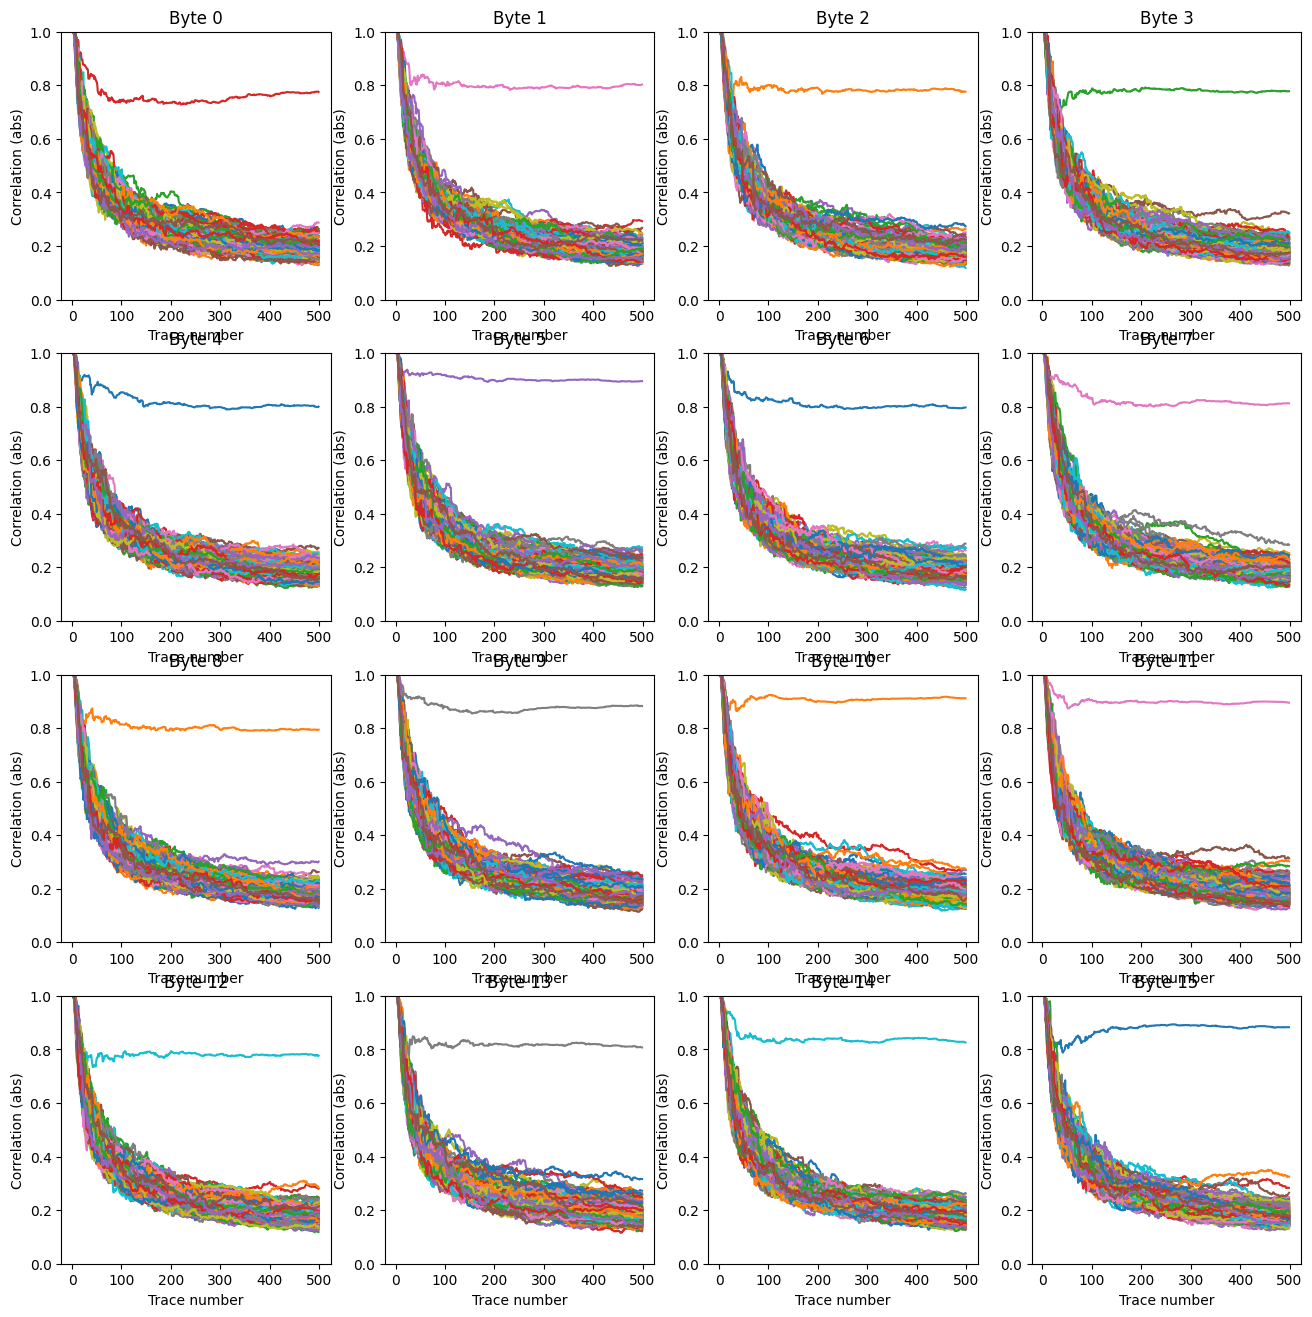

In [24]:
import time
import cupy as cp
import matplotlib.pyplot as plt

# Assuming AES_Sbox and hw_list are originally NumPy arrays, we convert them to CuPy arrays
AES_Sbox = cp.array(AES_Sbox)  # Convert AES_Sbox to a CuPy array
hw_list = cp.array(hw_list)    # Convert hw_list to a CuPy array

# Parameters
byte_num = 16
key_num = 256
trace_computed = 500
trace_len = t.shape[1]  # Assuming t has been defined with shape (trace_computed, trace_len)

# Initialize arrays as CuPy arrays
h_sum = cp.zeros((byte_num, key_num))
h2_sum = cp.zeros((byte_num, key_num))
t_sum = cp.zeros((1, trace_len))
t2_sum = cp.zeros((1, trace_len))
h_t_sum = cp.zeros((byte_num, key_num, trace_len))
r = cp.zeros((byte_num, key_num, trace_len))
key_guess = cp.zeros(byte_num, dtype=cp.int16)
max_r = cp.zeros((byte_num, trace_computed, key_num))

# Start timing
start_time = time.time()

print(f'True Key : {k[0]}')

for i in range(trace_computed):
    n = i + 1
    t_sum += t[i]
    t2_sum += t[i]**2
    std_t = cp.sqrt(t2_sum - t_sum**2 / n) + 1e-40  # Use cp.sqrt for CuPy compatibility
    
    for b in range(byte_num):
        # Ensure indexing compatibility by using CuPy arrays
        h = hw_list[AES_Sbox[cp.array(p[i, b]) ^ cp.arange(key_num)]]
        h_sum[b] += h
        h2_sum[b] += h**2
        h_t_sum[b] += cp.outer(h, t[i])
        
        nom = h_t_sum[b] - cp.outer(h_sum[b], t_sum) / n
        denom = cp.outer(cp.sqrt(h2_sum[b] - h_sum[b]**2 / n), std_t)
        rho = nom / denom
        max_r[b, i] = cp.max(cp.abs(rho), axis=1)
        
        # Use CuPy functions for argmax and unravel_index
        index = cp.unravel_index(cp.argmax(cp.abs(r[b]), axis=None), r[b].shape)
        key_guess[b] = int(index[0])
        
        r[b] = rho
    
    print(f'[{i}]{key_guess.get()}')  # Use .get() if key_guess needs to be printed as a NumPy array

# End timing
end_time = time.time()
print(f"Total Computing Time: {end_time - start_time:.2f} seconds")

# Plotting
plt.figure(figsize=(16, 16))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.ylim([0, 1])
    plt.plot(max_r[i].get())  # Convert max_r[i] to a NumPy array with .get()
    plt.title(f'Byte {i}')
    plt.ylabel('Correlation (abs)')
    plt.xlabel('Trace number')

plt.savefig('maxcorr_trace.png')
plt.show()


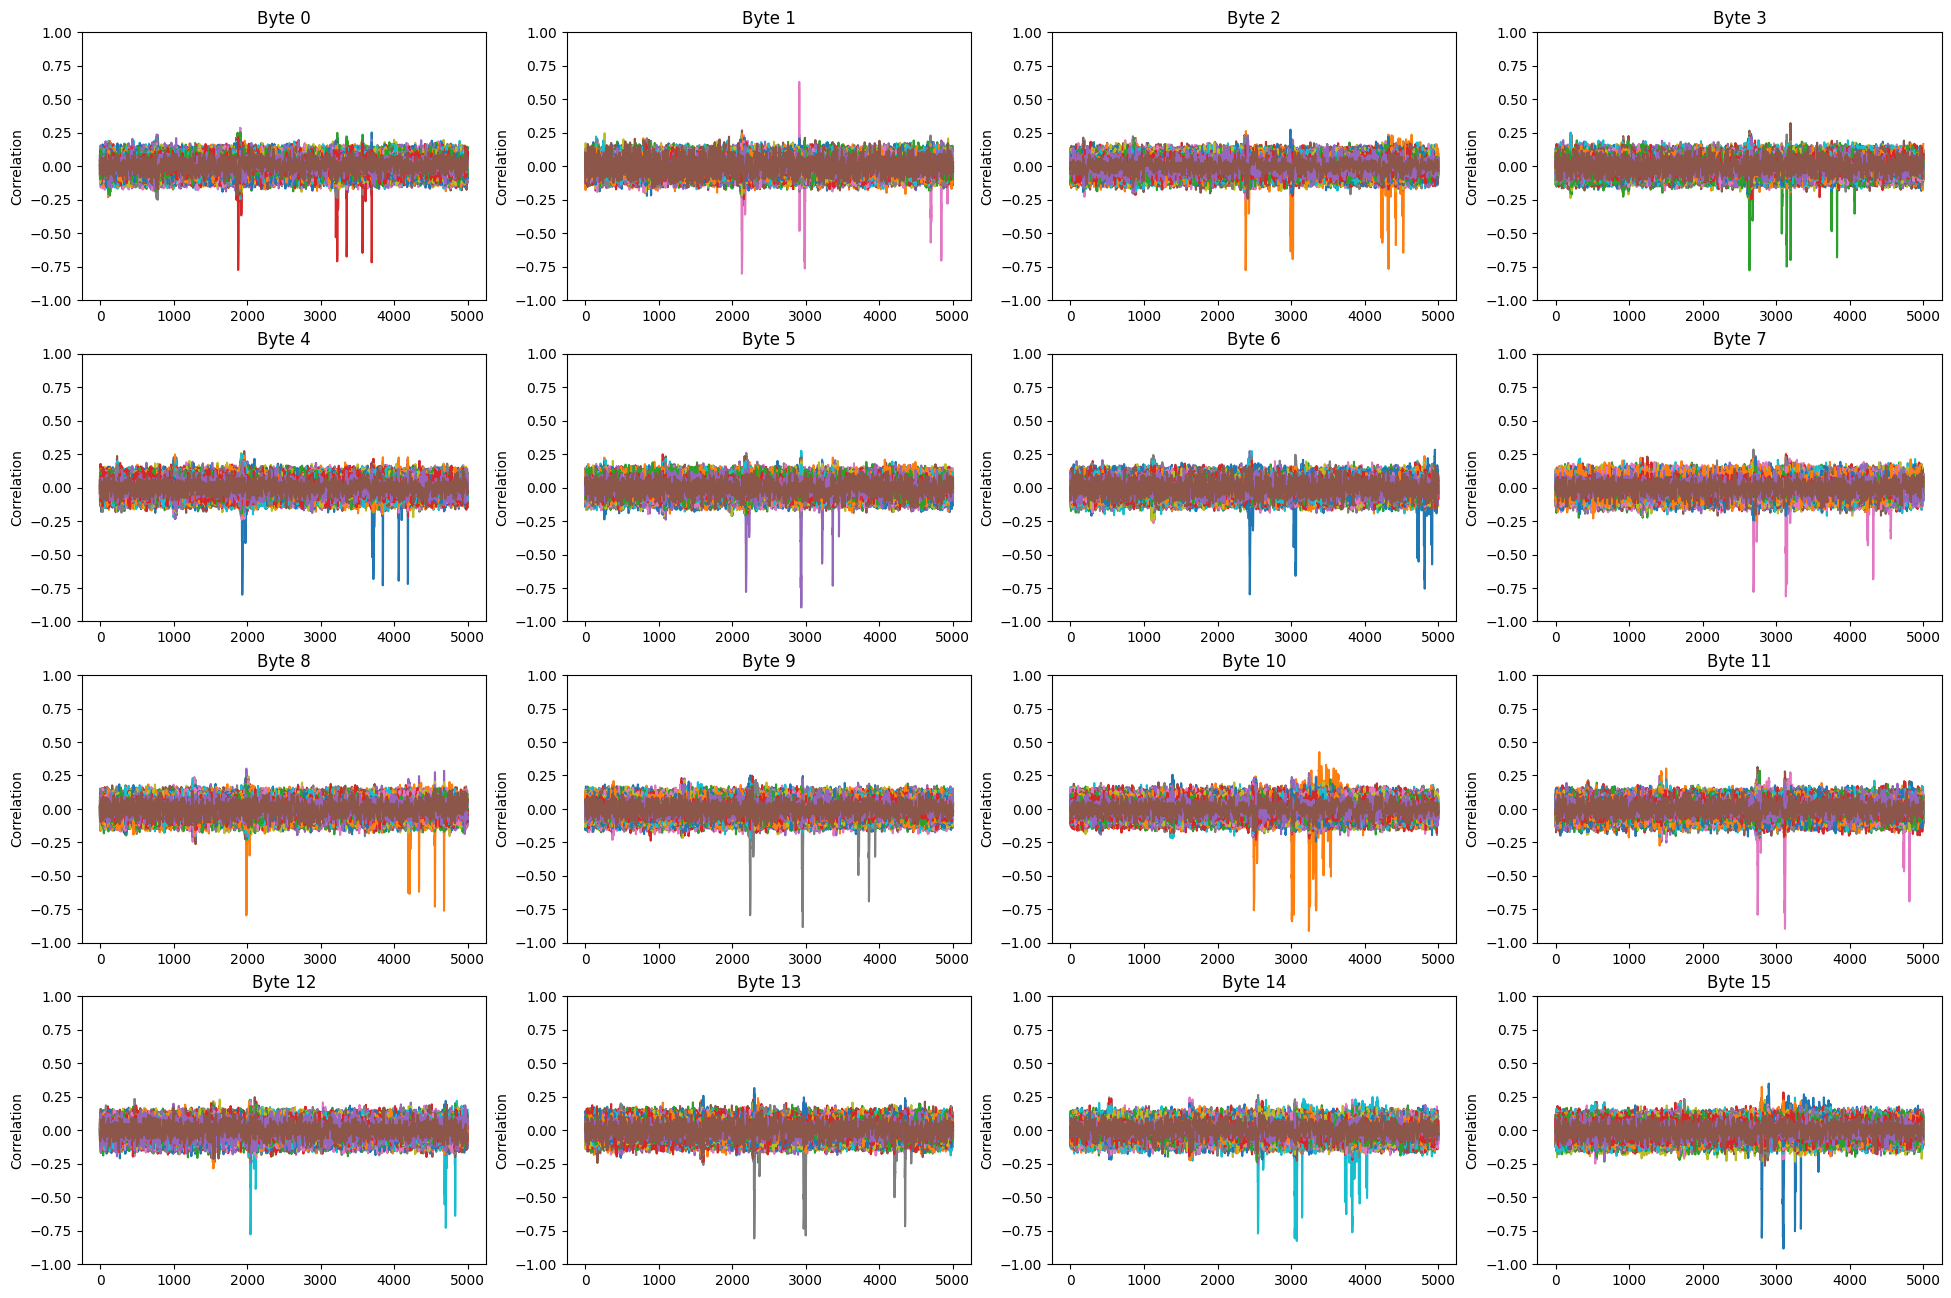

In [17]:
plt.figure(figsize=(24, 16))

for i in range(byte_num):
    plt.subplot(4, 4, i + 1)
    plt.ylim([-1, 1])
    plt.plot(r[i].T.get())  # Convert r[i].T to a NumPy array using .get()
    plt.title(f'Byte {i}')
    plt.ylabel('Correlation')

plt.savefig('cpa_result.png')
plt.show()

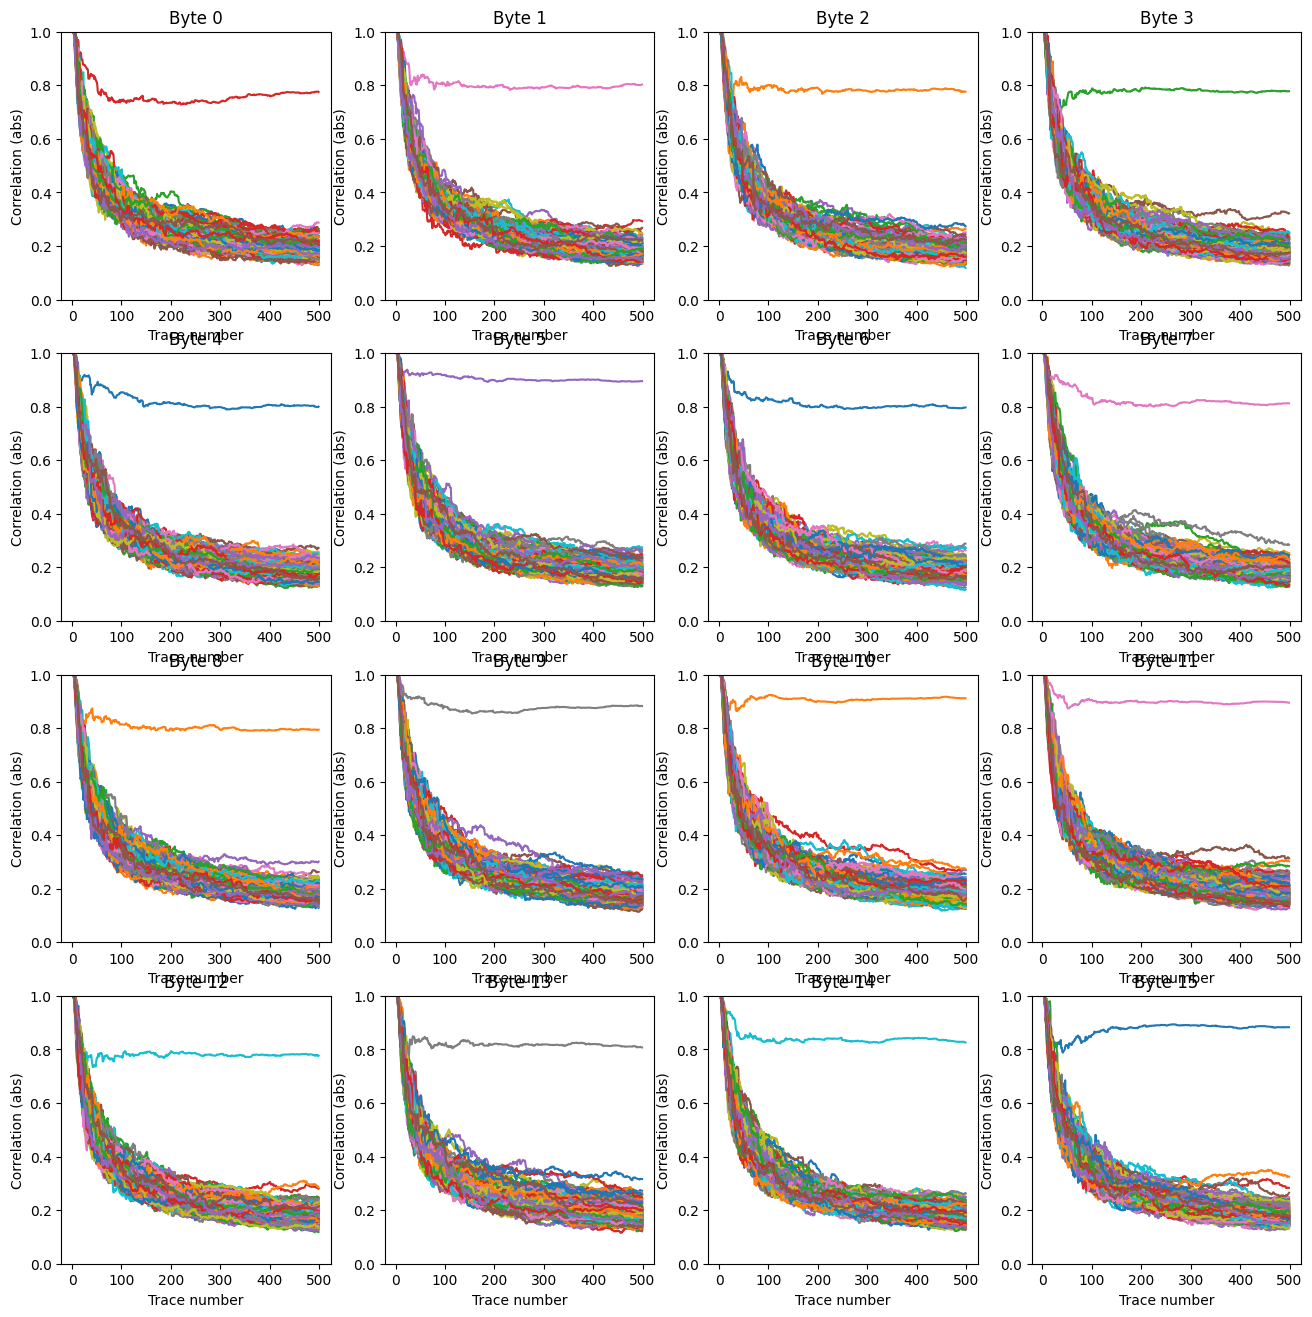

In [20]:
plt.figure(figsize=(16, 16))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.ylim([0, 1])
    plt.plot(max_r[i].get())  # Convert max_r[i] to a NumPy array with .get()
    plt.title(f'Byte {i}')
    plt.ylabel('Correlation (abs)')
    plt.xlabel('Trace number')

plt.savefig('maxcorr_trace.png')
plt.show()
